In [2]:
from lcmap.client import Client
client = Client();

In [4]:
x = -2062080
y =  2952960
t1 = "2002-01-01"
t2 = "2003-01-01"

In [17]:
mask_spec, masks = client.data.tiles("LANDSAT_7/ETM/cfmask", x, y, t1, t2, mask=False, unscale=False)
srb1_spec, sr_b1 = client.data.tiles("LANDSAT_7/ETM/sr_band1", x, y ,t1, t2, mask=False, unscale=False)

Get information about the mask using the tile spec.

In [7]:
mask_spec

{u'band_category': u'qa',
 u'band_long_name': u'cfmask_band',
 u'band_name': u'cfmask',
 u'band_product': u'cfmask',
 u'band_short_name': u'LT5CFMASK',
 u'band_spectrum': None,
 u'data_fill': 255,
 u'data_mask': {u'0': u'clear',
  u'1': u'water',
  u'2': u'cloud_shadow',
  u'255': u'fill',
  u'3': u'snow',
  u'4': u'cloud'},
 u'data_range': [0, 4],
 u'data_scale': None,
 u'data_shape': [256, 256],
 u'data_type': u'UINT8',
 u'data_units': None,
 u'instrument': u'TM',
 u'keyspace_name': u'lcmap',
 u'pixel_x': 30.0,
 u'pixel_y': -30.0,
 u'projection': u'PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["false_easting",0],PARAM

Assign the first mask and sr_band1 tile to more convenient names.

In [31]:
m0, t0 = masks[16], sr_b1[16]
m0.source, m0.data

('LE70460282002130EDC00', array([[0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ..., 
        [2, 2, 2, ..., 2, 2, 4],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=uint8))

Are the two tiles acquired at the same moment in time, from the same source?

In [20]:
[m0.acquired==t0.acquired, m0.source==t0.source]

[True, True]

Now, use the mask to filter out the SR data.

In [14]:
import numpy as np

Counting the unmasked data points. No surprise, 256*256...

In [32]:
np.ma.count(t0.data)

16384

Counting the clear pixels...

In [33]:
np.ma.masked_where(m0.data == 0, t0.data)

masked_array(data =
 [[-- -- -- ..., 2125 2190 2467]
 [-- -- -- ..., 1584 1517 1781]
 [-- -- -- ..., 1099 1031 1275]
 ..., 
 [877 577 344 ..., 189 263 387]
 [647 554 415 ..., 261 263 339]
 [508 462 415 ..., 285 287 339]],
             mask =
 [[ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]],
       fill_value = 999999)

In [43]:
np.ma.masked_where(m0.data == 4, t0.data)

masked_array(data =
 [[207 260 234 ..., 146 146 173]
 [182 235 262 ..., 146 146 173]
 [209 235 287 ..., 197 197 198]
 ..., 
 [192 218 192 ..., 170 220 220]
 [167 192 192 ..., 221 220 245]
 [218 192 116 ..., 221 195 194]],
             mask =
 False,
       fill_value = 999999)

In [34]:
np.ma.masked_where(m0.data == 4, t0.data).count()

14989

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib as mpl
import skimage.exposure as ex
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
mask_spec['data_mask']

{'0': 'clear',
 '1': 'water',
 '2': 'cloud_shadow',
 '255': 'fill',
 '3': 'snow',
 '4': 'cloud'}

In [37]:
labels = mask_spec['data_mask'].values()
N = len(labels)
cmap = plt.cm.jet
cmaplist = [cmap(i*2) for i in range(N)]
cmap = cmap.from_list('CFMask cmap', cmaplist, N)

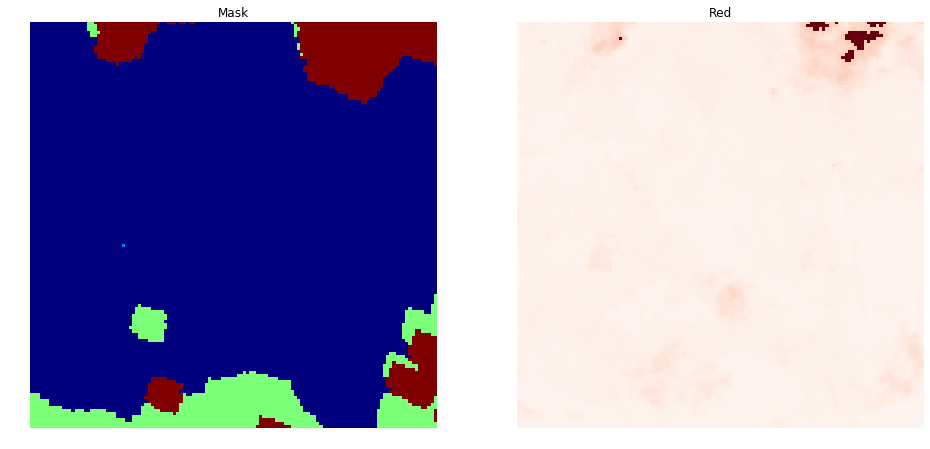

In [38]:
fig = plt.figure(figsize=(16,8))

s1 = fig.add_subplot(1,2,1)
s1.axis('off')
s1.set_title("Mask")
s1.imshow(m0.data, interpolation='nearest')

s2 = fig.add_subplot(1,2,2)
s2.axis('off')
s2.set_title("Red")
s2.imshow(t0.data, interpolation='nearest', cmap=cm.Reds)